In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:

def csv_to_dataframe(file_path):
   # Load csv file
   df = pd.read_csv(file_path)
   ################
   ### only RB for now
   # df = df[df['Pos'] == 'RB']
   df.reset_index( inplace=True)

   
   return df
def get_average_ranking_scores(rank_df, file):
   year = file[-8:-4]
   
   df = csv_to_dataframe(file)
   df = df.dropna(thresh=(df.shape[1] - 5)).sort_values(by='TTL', ascending=False)
   df['percentage'] = (df['TTL'] / df['TTL'].iloc[:200].sum()) 

   df = pd.DataFrame({f'Share_{year}': df.percentage})
   
   if not rank_df.empty:
      rank_df = rank_df.join(df)

   else:
      rank_df = df
   #print(df.head())
   return(rank_df)
   # Call the function


In [169]:


file_path = []
# Provide the path to your csv file
# file_path.append('./stats/results_ff_2013.csv')
# file_path.append('./stats/results_ff_2014.csv')
# file_path.append('./stats/results_ff_2015.csv')
# file_path.append('./stats/results_ff_2016.csv')
file_path.append('./stats/results_ff_2017.csv')
file_path.append('./stats/results_ff_2018.csv')
file_path.append('./stats/results_ff_2019.csv')
file_path.append('./stats/results_ff_2020.csv')
file_path.append('./stats/results_ff_2021.csv')
file_path.append('./stats/results_ff_2022.csv')

# Call the function
rank_df = pd.DataFrame()
for file in file_path:
    # print(rank_df.head(5))
    rank_df = get_average_ranking_scores(rank_df, file)

rank_df['5_year_avg_share'] = rank_df.mean(axis=1)
print(rank_df)

     Share_2017  Share_2018  Share_2019  Share_2020  Share_2021  Share_2022  \
0      0.019214    0.021091    0.020934    0.019948    0.020252    0.021589   
1      0.016541    0.017926    0.020512    0.019215    0.019195    0.020748   
2      0.016519    0.017263    0.017315    0.019072    0.018753    0.019329   
3      0.016342    0.017208    0.016650    0.018709    0.018147    0.018574   
4      0.016303    0.016788    0.016560    0.018507    0.017798    0.016067   
..          ...         ...         ...         ...         ...         ...   
396   -0.000028    0.000551    0.001157    0.001372    0.001469    0.001349   
397   -0.000044    0.000541    0.001152    0.001357    0.001440    0.001344   
398   -0.000055    0.000516    0.001142    0.001328    0.001440    0.001334   
399   -0.000110    0.000511    0.001117    0.001318    0.001440    0.001324   
400   -0.000127    0.000501    0.001102    0.001279    0.001435    0.001324   

     5_year_avg_share  
0            0.020505  
1  

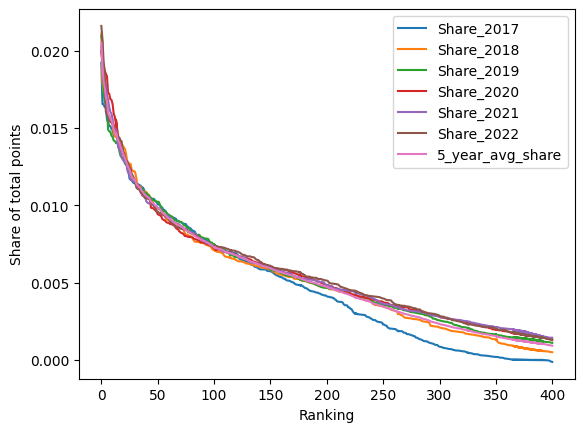

In [170]:
rank_df.plot(kind="line")
plt.xlabel('Ranking')
plt.ylabel('Share of total points')
# display the plot
plt.show()


In [171]:

def csv_to_dataframe(file_path):
    # Load csv file
    df = pd.read_csv(file_path)
    
    return df

# Provide the path to your csv file
file_path = './stats/2022adp.csv'

# Call the function
df_adp = csv_to_dataframe(file_path)
df_adp['Player'] = df_adp['Player'].astype(str)
#df_adp = df_adp[['Ovr Rank', 'ADP Change']]
#print(df_adp.head(5))


In [182]:
import pandas as pd

def csv_to_dataframe(file_path):
    # Load csv file
    df = pd.read_csv(file_path)
    
    return df

# Provide the path to your csv file
file_path = './stats/2022results.csv'

# Call the function
df_results = csv_to_dataframe(file_path)

df_results['Player'] = df_results['Player'].astype(str)
df_results = df_results.drop(columns=['Pos'])
df_adp_res = pd.concat([df_adp.set_index('Player'), df_results.set_index('Player')], axis=1, join='inner').reset_index().iloc[:200]
df_adp_res['5_year_avg_share'] =   rank_df['5_year_avg_share'] 
df_adp_res['Exp Points'] =  df_adp_res['TTL'].iloc[:200].sum() * df_adp_res['5_year_avg_share'] 
df_adp_res['Act Exp Diff'] =  df_adp_res['TTL'] - df_adp_res['Exp Points']
df_adp_change_exp_points = df_adp_res[['Act Exp Diff', 'ADP Change', 'Ovr Rank', 'Exp Points', 'TTL']].iloc[:200]
#relationship between adp movement and differential
print(df_adp_change_exp_points['Act Exp Diff'].sum()/df_adp_change_exp_points['ADP Change'].sum())
df_adp_change_pos  = df_adp_change_exp_points[(df_adp_change_exp_points['ADP Change'] > 0) ]
print(df_adp_change_pos['Act Exp Diff'].sum()/df_adp_change_pos['ADP Change'].sum())
df_adp_change_neg  = df_adp_change_exp_points[(df_adp_change_exp_points['ADP Change'] <0) ]
print(df_adp_change_neg['Act Exp Diff'].sum()/df_adp_change_neg['ADP Change'].sum())
df_adp_change_exp_points  = df_adp_change_exp_points[(df_adp_change_exp_points['ADP Change'] > 5) | (df_adp_change_exp_points['ADP Change'] < -5)]
df_adp_change_exp_points  = df_adp_change_exp_points[(df_adp_change_exp_points['Act Exp Diff'] < 100) & (df_adp_change_exp_points['Act Exp Diff'] > -100)]



9.85331229505937e-15
2.7837330614150306
1.693463388909486


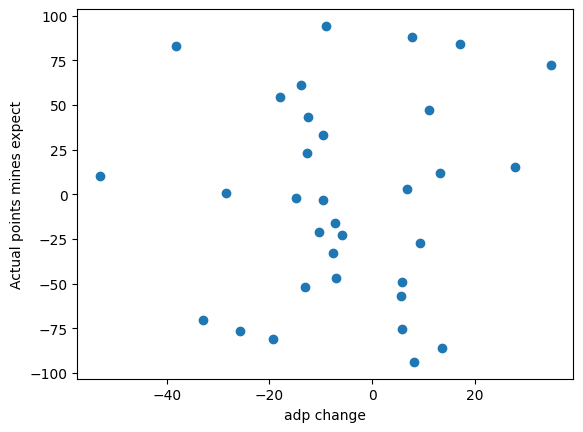

In [183]:
plt.scatter(df_adp_change_exp_points['ADP Change'],df_adp_change_exp_points['Act Exp Diff'])
plt.xlabel('adp change')
plt.ylabel('Actual points mines expect')
# display the plot
plt.show()
